image data shape (1797, 64)
label data shape (1797,)
[4]
Actual Label: 4
Predicted Label: [4 0 9 1 8 7 1 5 1 6]
the corresponding actual value are [4 0 9 1 4 7 1 5 1 6]
0.9516908212560387
[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


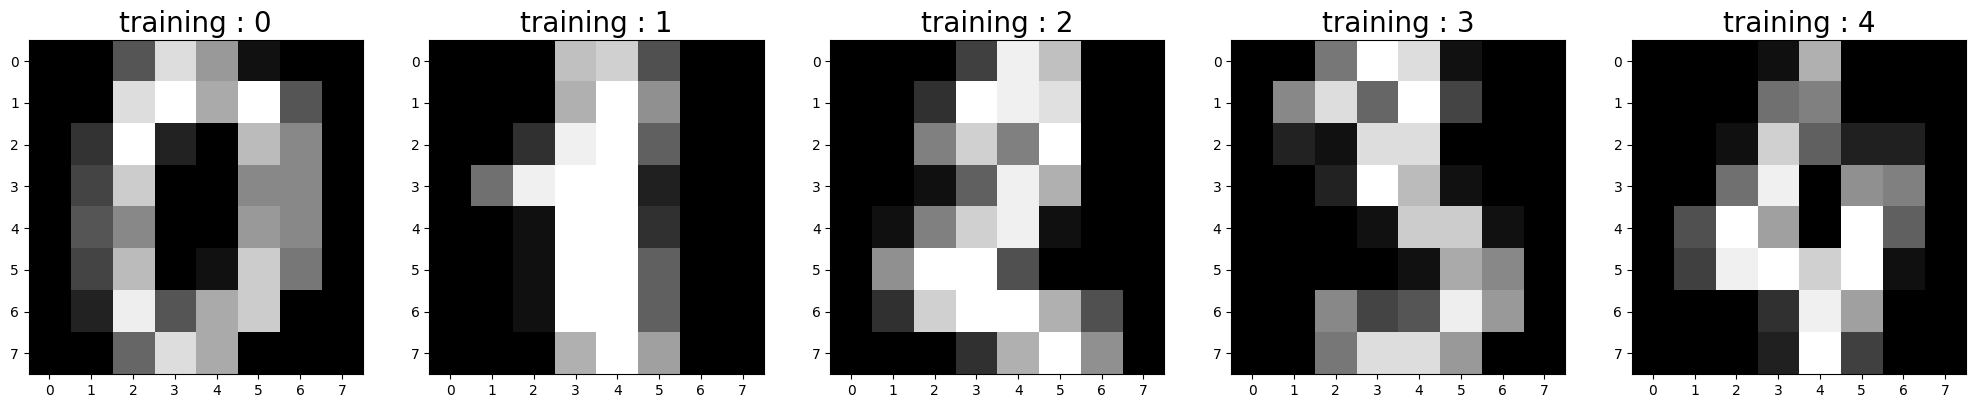

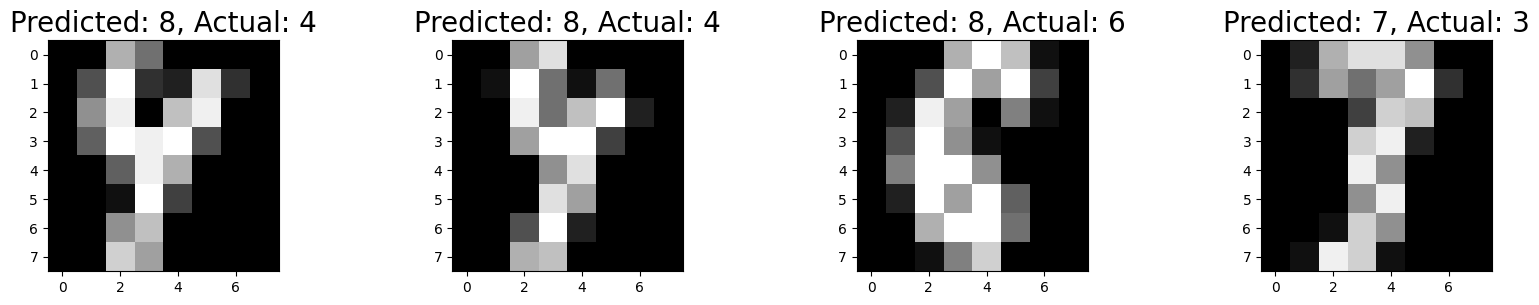

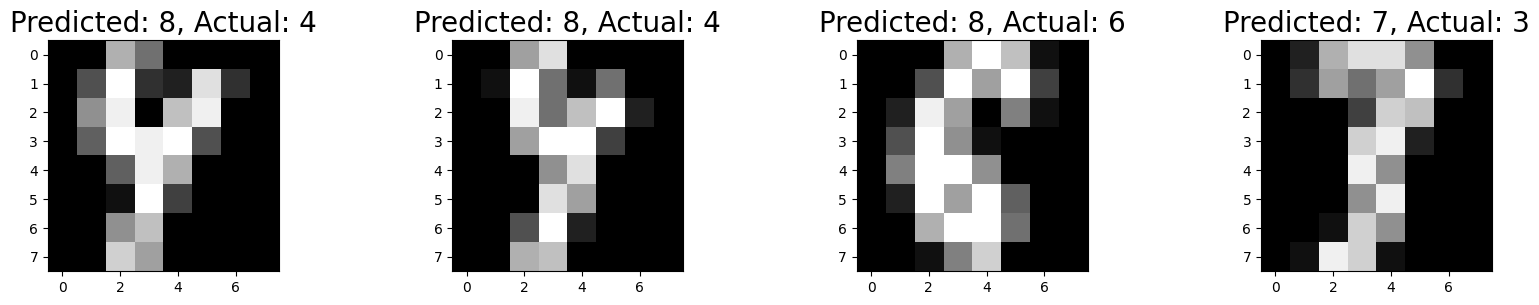

In [41]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

#determining the total number of images and labels

print("image data shape",digits.data.shape)
#total no of images of digits =1797
print("label data shape",digits.target.shape)
#digits are from 0-9

#now generating image
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
for index , (image,label) in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training : %i' % label, fontsize=20)

#now separting testing and trainign model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23 , random_state=2)
#y_train is the label(depend on pixel weather it is 0-9 ?) and x_train are the features(independent) (input)
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# hamare pass itne test or train cases agaye hain train karne ke lie model ko


from sklearn.linear_model import LogisticRegression
logisticregr = LogisticRegression(max_iter=1000)

#ab regressor ke model ke andar training values ko fit karwayenge
logisticregr.fit(x_train,y_train)

#now to predict the first digit of our test shape
print(logisticregr.predict(x_test[0].reshape(1,-1)))
#corresponding preiction ki asal value kia hai uske ie
print("Actual Label:", y_test[0])

#now predicting the fi-rst 10 values
predictions=logisticregr.predict(x_test[0:10])
print("Predicted Label:", predictions)
print("the corresponding actual value are", y_test[0:10])

#it will contain the array of all predicted vlus
predictions=logisticregr.predict(x_test)


#now lets check the accuracy
#jo bhe x tests se answer ayenge predited unhe divide kardega actual labels (values digits se) to hamae pass accuracy rate ajayega

score=logisticregr.score(x_test,y_test)
print(score)
#project completed , but now lets see how to find it out by confusion matrix
#cm banayega matrix overll saari predictions ko test ke samne rakhega or agar correct to diagonal me +1 warna us ndex me +1 jo galat predict ki houngi to aisa karke matrix banjayega poora
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
index = 0  # Initialize index properly
misclassifiedIndex = []

# Identify misclassified samples
for predict, actual in zip(predictions, y_test):
    if predict != actual:  # Fix incorrect comparison syntax
        misclassifiedIndex.append(index)
    index += 1

# Plot the first 4 misclassified images
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)

# Plot another set of misclassified images (repeated block)
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)

#
